# HSE 2023: Mathematical Methods for Data Analysis

## Homework 5

### Contents

#### PCA, t-SNE – 4 points
* [Task 1](#task1) (1.5 points)
* [Task 2](#task2) (0.5 points)
* [Task 3](#task3) (0.5 points)
* [Task 4](#task3) (1 points)
* [Task 5](#task4) (0.5 points)

#### Clustering – 6 points
* [Task 5](#task5) (1.5 points)
* [Task 6](#task6) (1.5 points)
* [Task 7](#task7) (1.5 points)
* [Task 8](#task8) (0.5 point)
* [Task 9](#task8) (1 point)

Load the file `data_Mar_64.txt`.

In [1]:
import pandas as pd
data = pd.read_csv('data_Mar_64.txt', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,Acer Campestre,0.003906,0.003906,0.027344,0.033203,0.007812,0.017578,0.023438,0.005859,0.000000,...,0.011719,0.000000,0.005859,0.035156,0.027344,0.033203,0.001953,0.000000,0.017578,0.0
1,Acer Campestre,0.005859,0.013672,0.027344,0.025391,0.013672,0.029297,0.019531,0.000000,0.001953,...,0.017578,0.000000,0.021484,0.017578,0.046875,0.005859,0.003906,0.003906,0.046875,0.0
2,Acer Campestre,0.011719,0.001953,0.027344,0.044922,0.017578,0.042969,0.023438,0.000000,0.003906,...,0.035156,0.000000,0.015625,0.021484,0.056641,0.009766,0.003906,0.000000,0.015625,0.0
3,Acer Campestre,0.013672,0.011719,0.037109,0.017578,0.011719,0.087891,0.023438,0.000000,0.000000,...,0.015625,0.001953,0.021484,0.029297,0.033203,0.003906,0.000000,0.001953,0.027344,0.0
4,Acer Campestre,0.007812,0.009766,0.027344,0.025391,0.001953,0.005859,0.015625,0.000000,0.005859,...,0.023438,0.001953,0.021484,0.048828,0.056641,0.019531,0.000000,0.000000,0.013672,0.0


This [dataset](https://archive.ics.uci.edu/dataset/241/one+hundred+plant+species+leaves+data+set) consists of work carried out by James Cope, Charles Mallah, and James Orwell, Kingston University London. The Leaves were collected in the Royal Botanic Gardens, Kew, UK. 

For Each feature, a 64 element vector is given per sample of leaf. One file for each 64-element feature vectors. **Each row begins with the class label**. Here is the plant leaf **classification task**. The remaining 64 elements is the feature vector.

In [2]:
#Sixteen samples of leaf each of one-hundred plant species
data.shape

(1600, 65)

The first column is the target, put it in a separate variable.

In [3]:
import numpy as np

X, y_name = np.array(data.iloc[:, 1:]), data.iloc[:, 0]

**Task 1. <a id="task1"></a> (1.5 points)** Let's do the following pipeline (detailed instructions will be in next cells)

- Encode your textual target.
- Split your data into train and test. Train a simple classification model without any improvements and calculate metrics.
- Then let's look at the low dimensional representations of the features and look at the classes there. We will use linear method PCA and non-linear t-SNE (t-distributed stochastic neighbor embedding). In this task we learn how to visualize data at the low dimensional space and check whether the obtained points are separable or not.

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

The target variable takes a text value. Use the `LabelEncoder` from `sklearn` to encode the text variable `y_name` and save the resulting values to the variable `y`.

In [5]:
lab_enc = LabelEncoder()
y = lab_enc.fit_transform(y_name)

Split your data into **train** and **test** keeping 30% for the test.

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Train SVM with linear kernel on your data to predict target. Calculate accuracy, F-score. Also print out confusion matrix

In [7]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

acc = accuracy_score(y_test, y_pred)
fsc = f1_score(y_test, y_pred, average='weighted')
conf_matr = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {acc}')
print(f'F-score: {fsc}')
print(f'Confusion matrix: {conf_matr}')

Accuracy: 0.004166666666666667
F-score: 0.0035801454473002588
Confusion matrix: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Let's try Principal Component Analysis. Use the `PCA` method from `sklearn.decomposiion` to reduce the dimension of the feature space to two. Fix `random_state=1`

In [8]:
pca = PCA(n_components=2, random_state=1)
X_pca = pca.fit_transform(X)

Select objects that match values from 0 to 15 of the target variable `y`. Draw the selected objects in a two-dimensional feature space using the `scatter` method from `matplotlib.pyplot`. To display objects of different classes in different colors, pass `c = y[y<=15]` to the `scatter` method.

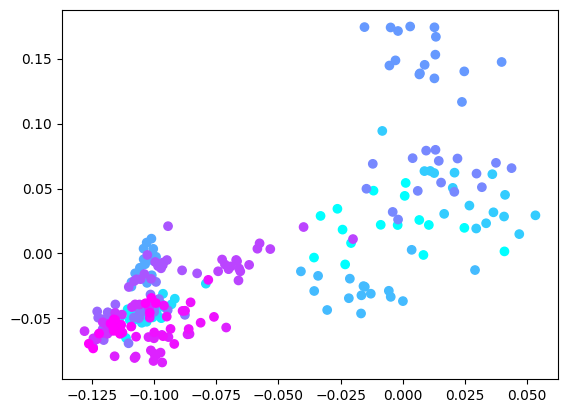

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X_pca[y<=15, 0], X_pca[y<=15, 1], c = y[y<=15], cmap="cool")
plt.show()

Do the same procedure as in two previous cells, but now for the `TSNE` method from `sklearn.manifold`.

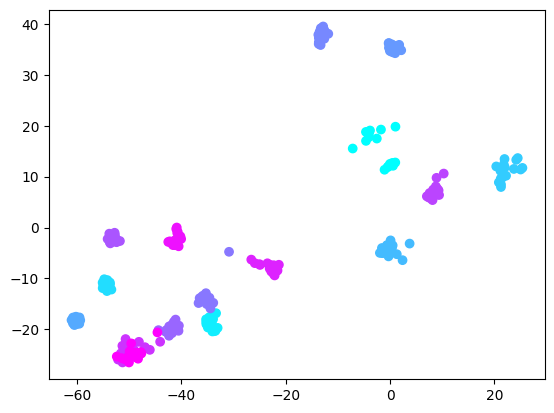

In [10]:
tsne = TSNE(n_components=2, random_state=1)
X_tsne = tsne.fit_transform(X)
plt.scatter(X_tsne[y<=15, 0], X_tsne[y<=15, 1], c = y[y<=15], cmap="cool")
plt.show()

**Task 2. <a id="task2"></a> (0.5 points)** Specify the coordinates of the object with index 2 (`X[2]`) after applying the TSNE method. Round the numbers to hundreds.

In [11]:
cords_2_tsne = X_tsne[2, :]
print(f"x={cords_2_tsne[0]:.2f}  y={cords_2_tsne[1]:.2f}")

x=0.57  y=12.13


**Task 3. <a id="task3"></a> (0.5 points)** Specify the coordinates of the object with index 2 (`X[2]`) after applying the PCA method. Round the numbers to hundreds.

In [12]:
cords_2_pca = X_pca[2, :]
print(f"x={cords_2_pca[0]:.2f}  y={cords_2_pca[1]:.2f}")

x=-0.03  y=0.03


**Task 4. <a id="task4"></a> (1 points)** What conclusions can be drawn from the obtained images? Choose the right one(s).

1) Using the principal components method, it was possible to visualize objects on a plane and objects of different classes are visually separable

2) Using the TSNE method, it was possible to visualize objects on a plane and objects of different classes are visually separable

3) Using the TSNE and PCA methods, it was possible to visualize objects on a plane and objects of different classes are visually separable

4) Using the TSNE and PCA methods, it was possible to visualize objects on a plane and objects of different classes are not visually separable

Answer: 2

**Task 5. (0.5 points)** Again try to fit your simple classifier, this time using transformed data to two-dimensional space. To do it choose the best feature representation in your opinion from two existing. Did the metrics improve?

In [13]:
## PCA
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=1)
svm_mod_pca = SVC(kernel='linear')
svm_mod_pca.fit(X_pca_train, y_train)
y_pred_pca = svm_mod_pca.predict(X_pca_test)
acc_pca = accuracy_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca, average='weighted')
conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)
print("----------------------PCA------------------------")
print(f"Accuracy: {acc_pca}")
print(f"F-score: {f1_pca}")
print(f"Confusion matrix: {conf_matrix_pca}")
print()

## TSNE
X_tsne_train, X_tsne_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.3, random_state=1)
svm_mod_tsne = SVC(kernel='linear')
svm_mod_tsne.fit(X_tsne_train, y_train)
y_pred_tsne = svm_mod_tsne.predict(X_tsne_test)
acc_tsne = accuracy_score(y_test, y_pred_tsne)
f1_tsne = f1_score(y_test, y_pred_tsne, average='weighted')
conf_matrix_tsne = confusion_matrix(y_test, y_pred_tsne)
print("----------------------TSNE------------------------")
print(f"Accuracy: {acc_tsne}")
print(f"F-score: {f1_tsne}")
print(f"Confusion matrix: {conf_matrix_tsne}")

'''
As we can see, TSNE shows much better results (both the accuracy and f-score are higher). 
So out of these two feature representations I would choose TSNE, as it performs better.
'''

----------------------PCA------------------------
Accuracy: 0.0020833333333333333
F-score: 8.662508662508662e-06
Confusion matrix: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

----------------------TSNE------------------------
Accuracy: 0.6395833333333333
F-score: 0.6247558300223741
Confusion matrix: [[1 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 6]]


'\nAs we can see, TSNE shows much better results (both the accuracy and f-score are higher). \nSo out of these two feature representations I would choose TSNE, as it performs better.\n'

## K_means

**Task 6. <a id="task5"></a> (1.5 points)** Implement the MyKMeans class.

The class must match the template shown below. Please, add code where needed. Some guidelines are the following:

The class constructor is passed to:
- n_clusters - the number of clusters that the data will be split into

- n_iters - the maximum number of iterations that can be done in this algorithm

Realize `update_centers` and `update_labels` methods.


In the `fit` method:

- Write sequential call of `self_centers` and `self_labels`.

then in the loop by the number of iterations you need to implement:
- calculate the nearest cluster center for each object
- recalculate the center of each cluster (the average of each of the coordinates of all objects assigned to this cluster)
put the calculated new cluster centers in the `new_centers` variable

In the `predict` method:

the nearest cluster centers for `X` objects are calculated

In [14]:
from IPython.display import clear_output
from sklearn.metrics import pairwise_distances_argmin

def plot_clust(X, centers, lables, ax): 
    ax.scatter(X[:,0], X[:,1], c=lables)
    ax.scatter(centers[:,0], centers[:,1], marker='>', color='red')


class MyKMeans():
    def __init__(self, n_clusters=3, n_iters=100, seed=None):
        self.n_clusters = n_clusters
        self.labels = None 
        self.centers = None 
        self.n_iters = n_iters
        self.seed = 0 if seed is None else seed
        np.random.seed(self.seed)

    def update_centers(self, X):
        cl = np.empty((self.n_clusters,X.shape[0],2))
        cl[:] = np.nan
        cl[self.labels,np.arange(X.shape[0]),:] = X
        centers = np.nanmean(cl, axis=1)
        if self.centers is not None:
            el = np.isnan(centers)[:,0]
            centers[el] = self.centers[el]
        return centers
    
    def update_labels(self, X):
        cl = np.empty((self.n_clusters,X.shape[0],2))
        cl[:,:,:] = X
        cl = np.moveaxis(cl, 1, 0)-self.centers
        labels = np.argmin(np.linalg.norm(cl, axis=2),axis=1)
        return labels

    def fit(self, X):
        self.labels = np.random.randint(self.n_clusters, size=X.shape[0])
        self.centers = self.update_centers(X)

        for it in range(self.n_iters):
            new_labels = self.update_labels(X)
            self.labels = new_labels

            new_centers = self.update_centers(X)
            if np.allclose(self.centers.flatten(), new_centers.flatten(), atol=1e-1):
                self.centers = new_centers
                self.labels = new_labels
                print('Converge by tolerance centers')

                fig, ax = plt.subplots(1,1)
                plot_clust(X, new_centers, new_labels, ax)
                return 0
      
            self.centers = new_centers

            fig, ax = plt.subplots(1,1)
            plot_clust(X, new_centers, new_labels, ax)
            plt.pause(0.3);
            clear_output(wait=True);
        

        return 1
    
    def predict(self, X):
        labels = self.update_labels(X)
        return labels

Generating data for clustering

In [15]:
from sklearn import datasets
n_samples = 1000

noisy_blobs = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 0.5, 0.5],
                             random_state=0)

In [16]:
X, y = noisy_blobs

**Task 7. <a id="task6"></a> (1.5 points)** 

7.1 Cluster noisy_blobs objects with `MyKMeans`, use the hyperparameters `n_clusters=3`, `n_iters=3`. Plot result. Specify the result label for the object with index 0.

In [17]:
clust = MyKMeans(n_clusters=3, n_iters=3)
clust.fit(X)
print("Result for object[0]: ", clust.predict(X[(0,),:])[0])

Result for object[0]:  1


7.2 Cluster noisy_blobs objects, use the hyperparameters `n_clusters=3`, `n_iters = 100`. Plot result. Specify the result label for the object with index 0.

Converge by tolerance centers
Result for object[0]:  1


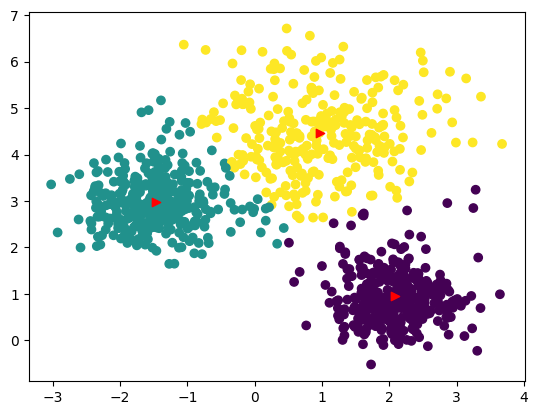

In [18]:
clust2 = MyKMeans(n_clusters=3, n_iters=100)
clust2.fit(X)
print("Result for object[0]: ", clust2.predict(X[(0,),:])[0])

7.3 Calculate how many objects changed the label of the predicted cluster when changing the hyperparameter n_iters from 3 to 100

In [19]:
counter = np.sum(clust2.predict(X) != clust.predict(X))
print("Number of changed objects: ", counter)

Number of changed objects:  93


**Task 8. <a id="task6"></a> (1.5 points)** 

Using the elbow method, select the optimal number of clusters, show it on the plot. As a metric, use the sum of the squares of the distances between the data points and the centroids of the clusters assigned to them divided by number of clusters. To do this, iterate the parameter k from 2 to 50 in steps of 2. 

Converge by tolerance centers


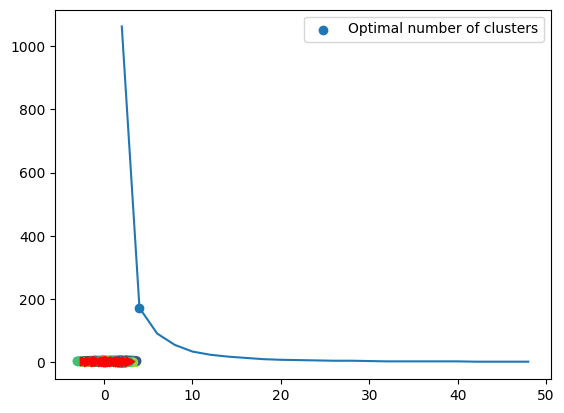

In [20]:
plt_x = np.arange(2, 50, 2)
plt_y = plt_x * 0
for i, j in enumerate(plt_x):
    k = j
    clust = MyKMeans(n_clusters=k)
    clust.fit(X)
    pred = clust.predict(X)
    cl = X - clust.centers[pred, :]
    plt_y[i] = np.sum(np.linalg.norm(cl, axis=1) ** 2) / k

plt.plot(plt_x, plt_y)
plt.scatter(plt_x[np.argmin(np.diff(plt_y))+1], plt_y[np.argmin(np.diff(plt_y))+1], label='Optimal number of clusters')
plt.legend()
plt.show()


## DBSCAN

**Task 9. <a id="task7"></a> (0.5 points)** Cluster noisy_blobs objects using DBSCAN. Use the DBSCAN implementation from sklearn. Fix the `eps=0.3` hyperparameter. Plot result. Specify the response for the object with index 2.

Result for object[2]:  0


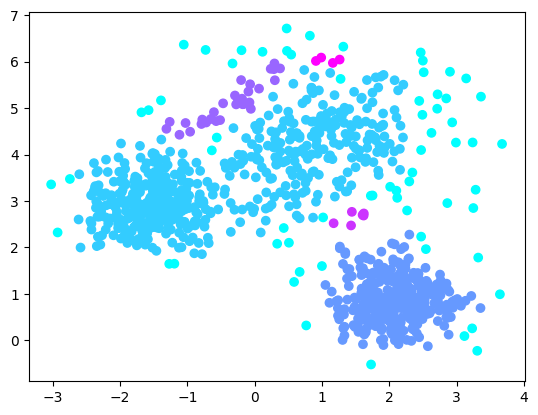

In [21]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3)
pred = dbscan.fit_predict(X, y)
print("Result for object[2]: ", pred[2])
plt.scatter(X[:,0], X[:,1], c=pred, cmap="cool")
plt.show()

**Task 10. <a id="task8"></a> (1 point)** 

Try different settings of ```eps``` distances (from 0.1 to 0.5) and several values of your choice of ```min_samples```. For each setting plot results. Also output the number of clusters and outliers (objects marked as -1).

eps=0.1 and min_samples=5: number of clusters=25 and number of outliers=567
eps=0.1 and min_samples=10: number of clusters=5 and number of outliers=902
eps=0.1 and min_samples=15: number of clusters=0 and number of outliers=1000
eps=0.1 and min_samples=20: number of clusters=0 and number of outliers=1000
eps=0.1 and min_samples=25: number of clusters=0 and number of outliers=1000
eps=0.2 and min_samples=5: number of clusters=10 and number of outliers=161
eps=0.2 and min_samples=10: number of clusters=5 and number of outliers=387
eps=0.2 and min_samples=15: number of clusters=2 and number of outliers=536
eps=0.2 and min_samples=20: number of clusters=2 and number of outliers=632
eps=0.2 and min_samples=25: number of clusters=3 and number of outliers=764
eps=0.3 and min_samples=5: number of clusters=5 and number of outliers=65
eps=0.3 and min_samples=10: number of clusters=4 and number of outliers=145
eps=0.3 and min_samples=15: number of clusters=4 and number of outliers=241
eps=0.3 and

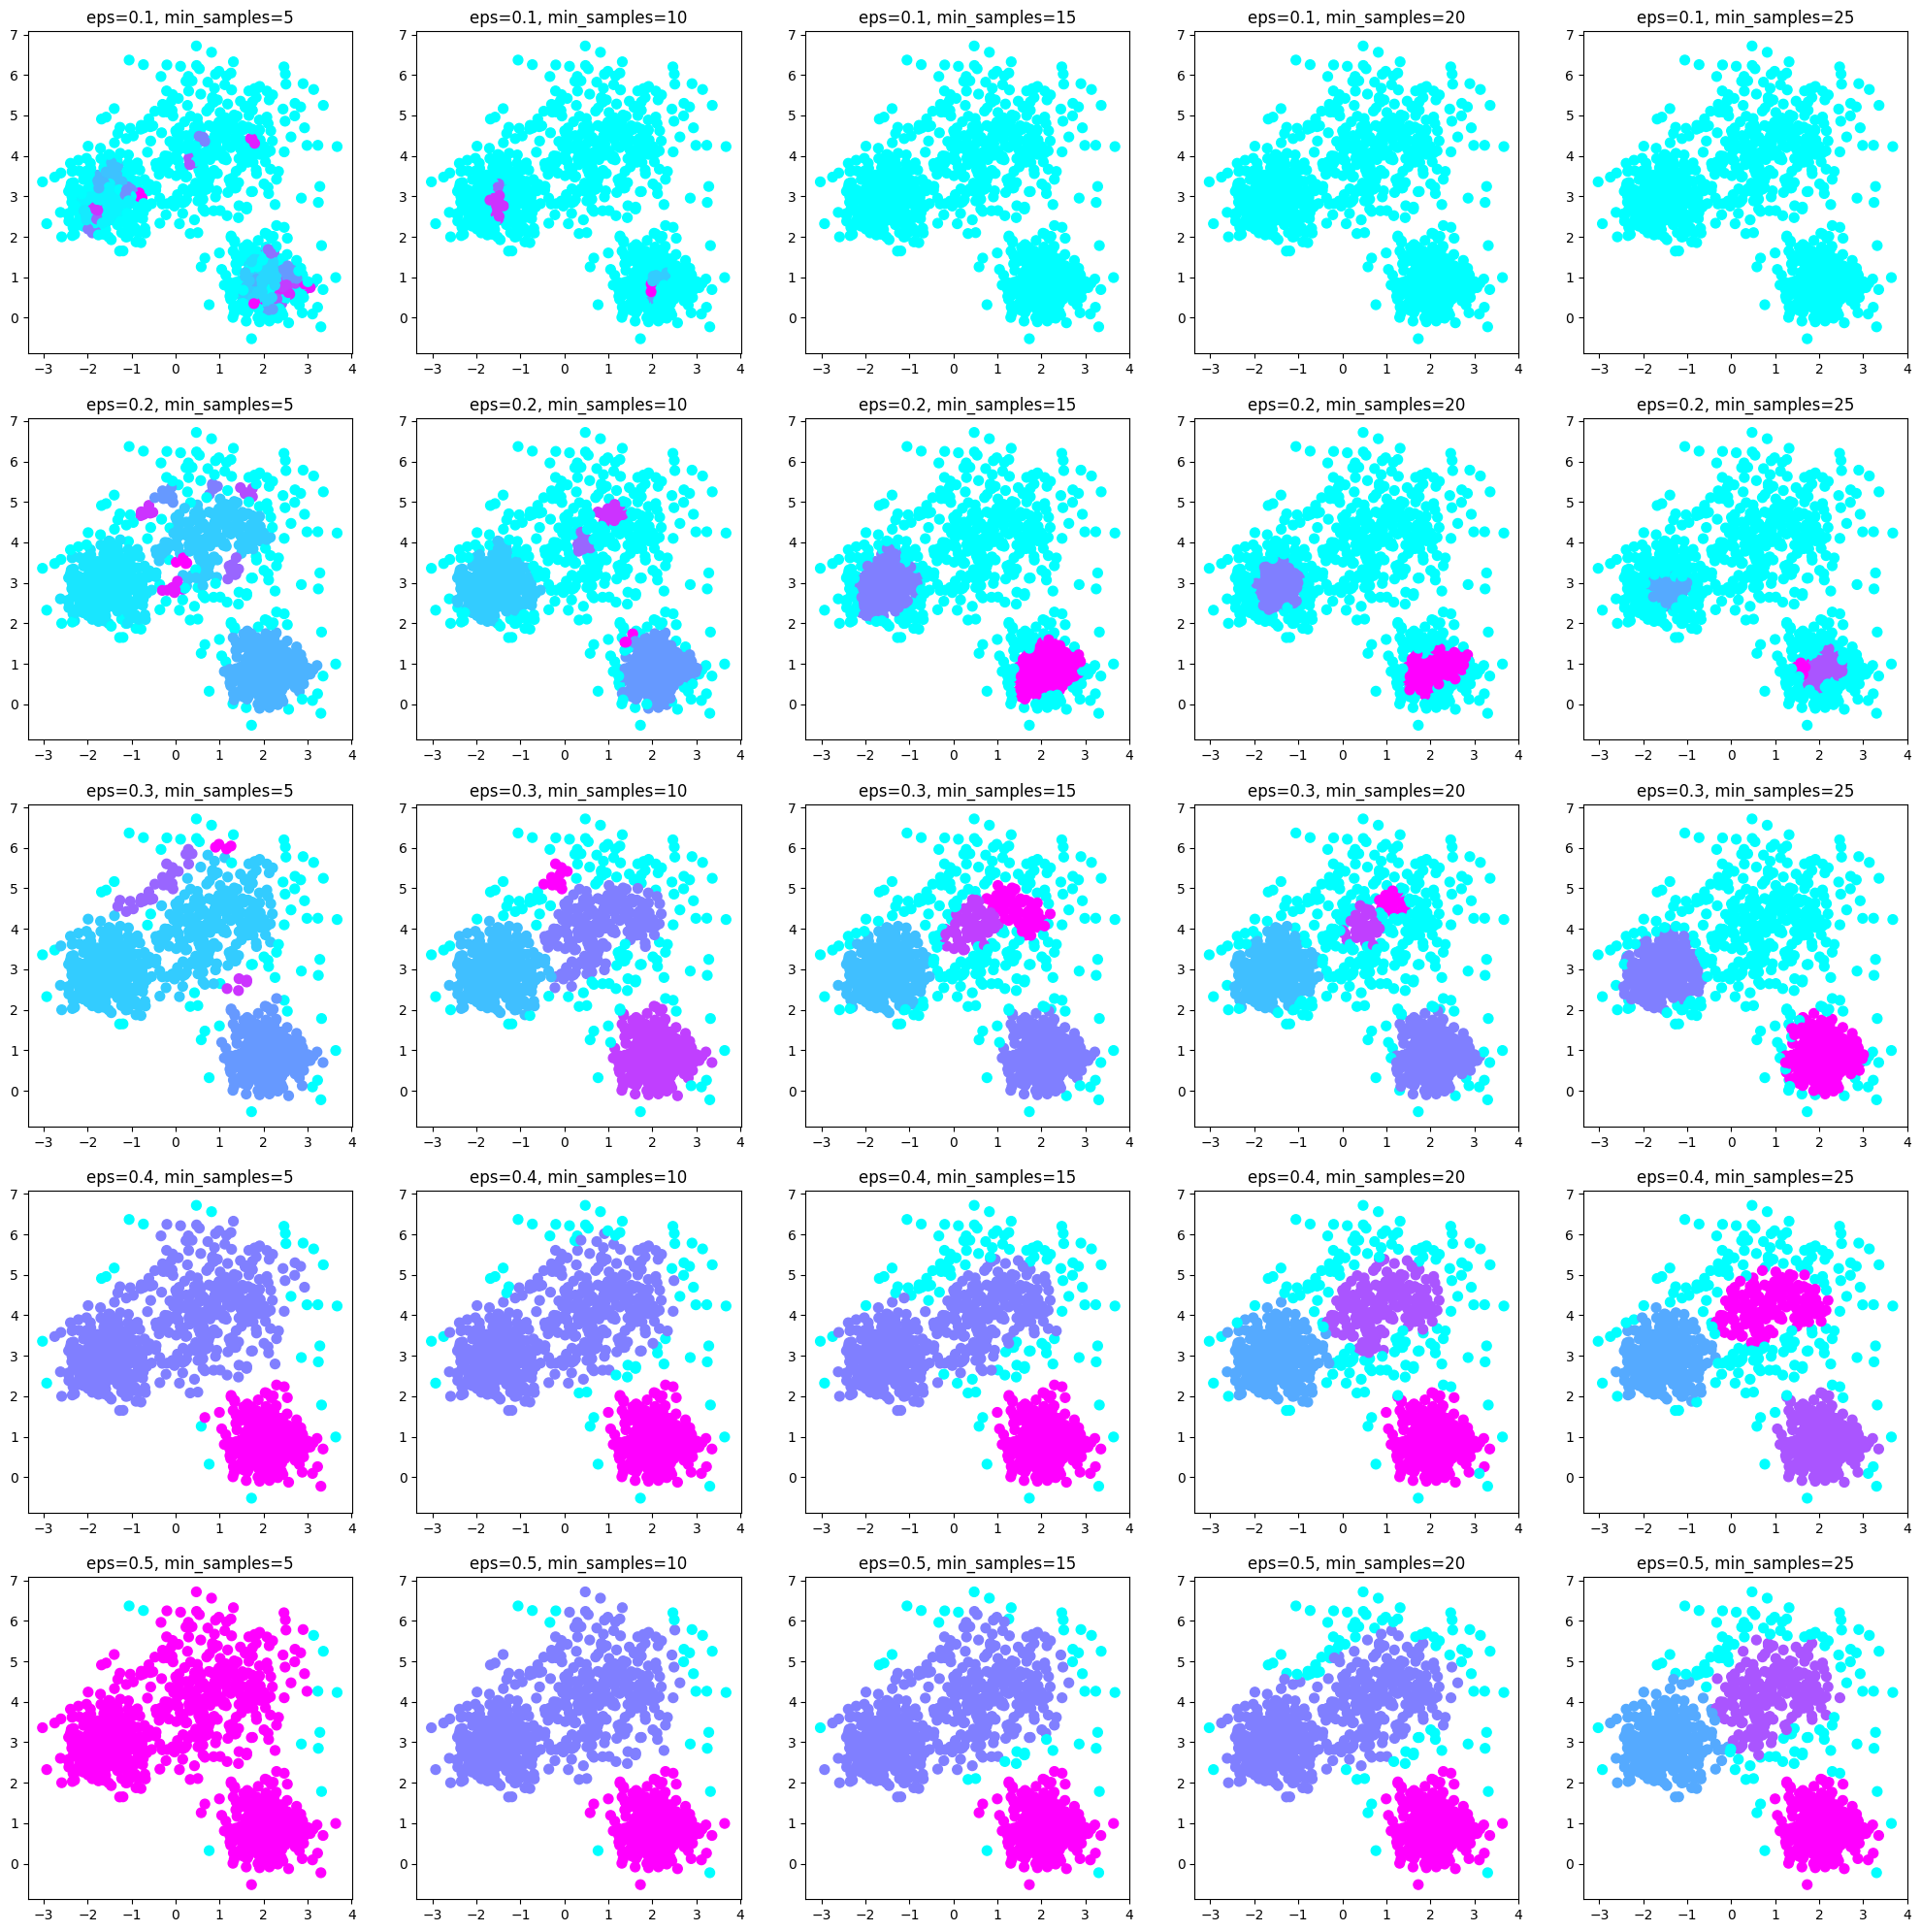

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

eps_values = [0.1, 0.2, 0.3, 0.4, 0.5]
min_samples_values = [5, 10, 15, 20, 25]

fig, gr = plt.subplots(len(eps_values), len(min_samples_values), figsize=(25, 25))

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        pred = dbscan.fit_predict(X)
        gr[i, j].scatter(X[:, 0], X[:, 1], c=pred, cmap='cool', s=50)
        gr[i, j].set_title(f'eps={eps}, min_samples={min_samples}')
        n_clusters = len(np.unique(pred)) - (1 if -1 in pred else 0)
        n_outliers = np.sum(pred == -1)
        print(f'eps={eps} and min_samples={min_samples}: number of clusters={n_clusters} and number of outliers={n_outliers}')

plt.show()